In [48]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [49]:
cm = 3
mN1 = 1
mN1_str = ''.join(str(mN1).split('.'))

# iM_file = uproot.open(f'../features/signal_reco_E-{cm}TeV_N-{mN1_str}TeV.root')
sM_file = uproot.open(f'../features/signal_schannel_reco_E-{cm}TeV_N-{mN1_str}TeV.root')
tM_file = uproot.open(f'../features/signal_tchannel_reco_E-{cm}TeV_N-{mN1_str}TeV.root')
sD_file = uproot.open(f'../features/signal_schannel_reco_E-{cm}TeV_N-{mN1_str}TeV_Dirac.root')
tD_file = uproot.open(f'../features/signal_tchannel_reco_E-{cm}TeV_N-{mN1_str}TeV_Dirac.root')
b_file = uproot.open(f'../features/background_reco_E-{cm}TeV.root')



In [50]:
# df_iM = pd.DataFrame(np.array(iM_file['t']['features'].array()))
df_sM = pd.DataFrame(np.array(sM_file['t']['features'].array()))
df_tM = pd.DataFrame(np.array(tM_file['t']['features'].array()))
df_sD = pd.DataFrame(np.array(sD_file['t']['features'].array()))
df_tD = pd.DataFrame(np.array(tD_file['t']['features'].array()))
df_b = pd.DataFrame(np.array(b_file['t']['features'].array()))

# df_i['target']=9
df_sM['target']=1
df_tM['target']=2
df_sD['target']=-1
df_tD['target']=-2
df_b['target']=0

df = pd.concat([df_sM, df_tM, df_sD, df_tD, df_b])
# dfI = pd.concat([df_i, df_b])
# df_o = df.copy()
# dfI_o = dfI.copy()

# df_i_o = df_i.copy()
df_sM_o = df_sM.copy()
df_tM_o = df_tM.copy()
df_sD_o = df_sD.copy()
df_tD_o = df_tD.copy()
df_b_o = df_b.copy()


In [51]:
def plot_pt_eta_phi_M(df, particle, cm=1, mN1=1):
    
    if (particle == 'Jet1') or (particle == 'Jet2'):
        df = df[df.nJets==2]
    elif (particle == 'JJ'):
        df = df[df.nJets==1]
    
    if (len(df) == 0):
        print(particle, ": No samples")
        return
    
#     df_i = df[df.target==9]
    df_sM = df[df.target==1]
    df_tM = df[df.target==2]
    df_sM = df[df.target==1]
    df_tM = df[df.target==2]
    df_b = df[df.target==0]
    
    try:
        plt.figure(figsize=(21, 4))

#         range_ = [0,500]
        range_ = [0,1300]
        ax1 = plt.subplot(141)
        if (len(df_i)!=0):
            ax1.hist(df_i['pt'+particle], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C3');
            ax1.hist(df_i['pt'+particle+'True'], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C3', linestyle='--');
        else:
            ax1.hist(df_sM['pt'+particle], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch', color='C0');
            ax1.hist(df_sM['pt'+particle+'True'], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', linestyle='--');
            ax1.hist(df_tM['pt'+particle], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch', color='C1');
            ax1.hist(df_tM['pt'+particle+'True'], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', linestyle='--');
            ax1.hist(df_sD['pt'+particle], weights=[1/len(df_sD)]*len(df_sD), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch', color='C2');
            ax1.hist(df_sD['pt'+particle+'True'], weights=[1/len(df_sD)]*len(df_sD), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C2', linestyle='--');
            ax1.hist(df_tD['pt'+particle], weights=[1/len(df_tD)]*len(df_tD), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch', color='C3');
            ax1.hist(df_tD['pt'+particle+'True'], weights=[1/len(df_tD)]*len(df_tD), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C3', linestyle='--');
        
        ax1.hist(df_b['pt'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C4');
        
        ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
                      r'$p_T$ of '+particle)

        range_ = [-5,5]
        ax2 = plt.subplot(142)
        if (len(df_i)!=0):
            ax2.hist(df_i['eta'+particle], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C3');
            ax2.hist(df_i['eta'+particle+'True'], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C3', linestyle='--');
        else:
            ax2.hist(df_sM['eta'+particle], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch', color='C0');
            ax2.hist(df_sM['eta'+particle+'True'], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', linestyle='--');
            ax2.hist(df_tM['eta'+particle], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch', color='C1');
            ax2.hist(df_tM['eta'+particle+'True'], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', linestyle='--');
        ax2.hist(df_b['eta'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C2');
        
        ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
                      r'$\eta$ of '+particle)

#         range_ = [-6,6]
#         ax3 = plt.subplot(143)
#         if (len(df_i)!=0):
#             ax3.hist(df_i['phi'+particle], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C3');
#             ax3.hist(df_i['phi'+particle+'True'], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C3', linestyle='--');
#         else:
#             ax3.hist(df_sM['phi'+particle], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch', color='C0');
#             ax3.hist(df_sM['phi'+particle+'True'], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', linestyle='--');
#             ax3.hist(df_tM['phi'+particle], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch', color='C1');
#             ax3.hist(df_tM['phi'+particle+'True'], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', linestyle='--');
#         ax3.hist(df_b['phi'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C2');
        
#         ax3.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
#                       r'$\phi$ of '+particle)


        
        if particle == 'JJ':
            range_ = [0,120]
            col = 'm'
        elif particle == 'N':
            range_ = [0,1000*mN1*1.1]
            col = 'm'
        else:
            if cm == 10:
                range_ = [0, 6000]
            elif cm == 3:
                range_ = [0,2000]
#                 range_ = [0,100]
            col = 'E'
            
        ax4 = plt.subplot(143)
        
        if (len(df_i)!=0):
            ax4.hist(df_i[col+particle], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C3');
            ax4.hist(df_i[col+particle+'True'], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C3', linestyle='--');
        else:
            ax4.hist(df_sM[col+particle], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch', color='C0');
            ax4.hist(df_sM[col+particle+'True'], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', linestyle='--');
            ax4.hist(df_tM[col+particle], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch', color='C1');
            ax4.hist(df_tM[col+particle+'True'], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', linestyle='--');
        ax4.hist(df_b[col+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C2');
        ax4.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
                      f'${col}$ of '+particle)

        

        ax1.legend() 
        plt.show()
        
        
    except ZeroDivisionError:
        print("No samples")



In [52]:
def plot_them(df):
    plot_pt_eta_phi_M(df, 'Lep', cm, mN1)
#     plot_pt_eta_phi_M(df, 'Jet1', cm, mN1)
#     plot_pt_eta_phi_M(df, 'Jet2', cm, mN1)
    plot_pt_eta_phi_M(df, 'JJ', cm, mN1)
    plot_pt_eta_phi_M(df, 'N', cm, mN1)

In [6]:
def cut_flow(df, col, upper=1e10, lower=-1e10, plot=False):
    print(f"cut :{col}>={lower} & {col}<={upper}")
    
    i_before = len(df[df.target==9])
    s_before = len(df[df.target==1])
    t_before = len(df[df.target==2])
    b_before = len(df[df.target==0])
    
    if i_before != 0 :
        print('Before cut:\tI samples:', i_before, '; B samples:', b_before)
    else:
        print('Before cut:\tS samples:', s_before, '; B samples:', b_before)
        print('Before cut:\tT samples:', t_before, '; B samples:', b_before)
    
    df = df[df[col] <= upper]
    df = df[df[col] >= lower]
    i_after = len(df[df.target==9])
    s_after = len(df[df.target==1])
    t_after = len(df[df.target==2])
    b_after = len(df[df.target==0])
    
    if i_before != 0 :
        print(f'After cut: \
        I samples: {i_after}/{i_before} ({round(100*(i_after/i_before),2)}%); B samples: {b_after}/{b_before} ({round(100*(b_after/b_before),2)}%)')
    else:
        print(f'After cut: \
        S samples: {s_after}/{s_before} ({round(100*(s_after/s_before),2)}%); B samples: {b_after}/{b_before} ({round(100*(b_after/b_before),2)}%)')
        print(f'After cut: \
        T samples: {t_after}/{t_before} ({round(100*(t_after/t_before),2)}%); B samples: {b_after}/{b_before} ({round(100*(b_after/b_before),2)}%)')
    
    if plot:
        plot_them(df)
        
    return df
    

In [7]:
# plot_them(dfI)
plot_them(df)

NameError: name 'plot_pt_eta_phi_M' is not defined

In [8]:
df = cut_flow(df_o, 'ptLep', lower=100, plot=True)

# df = cut_flow(dfI_o, 'ptLep', lower=100, plot=True)


NameError: name 'df_o' is not defined

In [9]:
df = cut_flow(df, 'ptJJ', lower=100, plot=True)
# df = cut_flow(df, 'ptJJ', lower=50, plot=True)

cut :ptJJ>=100 & ptJJ<=10000000000.0
Before cut:	S samples: 6138 ; B samples: 11908
Before cut:	T samples: 5707 ; B samples: 11908
After cut:         S samples: 6138/6138 (100.0%); B samples: 11908/11908 (100.0%)
After cut:         T samples: 5707/5707 (100.0%); B samples: 11908/11908 (100.0%)


NameError: name 'plot_pt_eta_phi_M' is not defined

In [10]:
mW = 80.379
widthW = 2.085
nwidth = 5

df = cut_flow(df, 'mJJ', upper=mW+nwidth*widthW ,lower=mW-nwidth*widthW, plot=True)

cut :mJJ>=69.95400000000001 & mJJ<=90.804
Before cut:	S samples: 6138 ; B samples: 11908
Before cut:	T samples: 5707 ; B samples: 11908
After cut:         S samples: 6138/6138 (100.0%); B samples: 11908/11908 (100.0%)
After cut:         T samples: 5707/5707 (100.0%); B samples: 11908/11908 (100.0%)


NameError: name 'plot_pt_eta_phi_M' is not defined

In [11]:
df_i = df[df.target==9]
df_t = df[df.target==1]
df_s = df[df.target==2]
df_b = df[df.target==0]


In [12]:
len(df_s)/len(df_s_o), len(df_s)/len(df_s_o)

NameError: name 'df_s_o' is not defined

m(N) between 900.0 and 1100.0 TeV
Signal:


NameError: name 'df_s_o' is not defined

<Figure size 864x360 with 0 Axes>

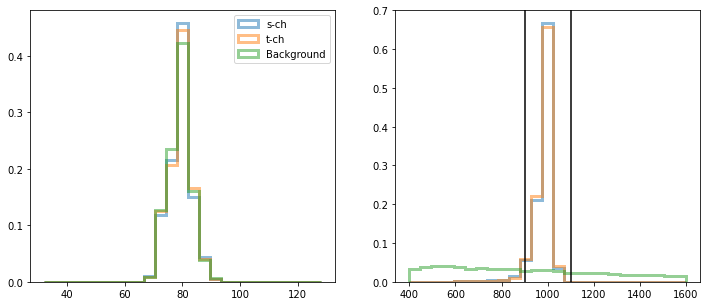

In [13]:

plt.figure(figsize=(12,5))

mJJ = 0.08
width_ = 0.6

sim_num=10000

plt.figure(figsize=(12,5))


ax1=plt.subplot(121)

range_ = [mJJ*(1-width_)*1000, mJJ*(1+width_)*1000]
# range_ = None
col = 'm'
particle = 'JJ'

if (len(df_i)!=0):
    ax1.hist(df_i[col+particle], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C3');
else:
    ax1.hist(df_s[col+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch', color='C0');
    ax1.hist(df_t[col+particle], weights=[1/len(df_t)]*len(df_t), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch', color='C1');
ax1.hist(df_b[col+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C2');



ax2=plt.subplot(122)

width_ = 0.6
width_num = 0.1
lower_b, upper_b = mN1*(1-width_num)*1000, mN1*(1+width_num)*1000

sim_num=10000

range_ = [mN1*(1-width_)*1000, mN1*(1+width_)*1000]

col = 'm'
particle = 'N'

if (len(df_i)!=0):
    ax2.hist(df_i[col+particle], weights=[1/len(df_i)]*len(df_i), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C3');
else:
    ax2.hist(df_s[col+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch', color='C0');
    ax2.hist(df_t[col+particle], weights=[1/len(df_t)]*len(df_t), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch', color='C1');
ax2.hist(df_b[col+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C2');


ax2.axvline(lower_b, color='black')
ax2.axvline(upper_b, color='black')

ax1.legend()

# ==================================================================================================

s_in_range = len(df_s[(df_s['mN'] >= lower_b) & (df_s['mN'] <= upper_b)])
t_in_range = len(df_t[(df_t['mN'] >= lower_b) & (df_t['mN'] <= upper_b)])
i_in_range = len(df_i[(df_i['mN'] >= lower_b) & (df_i['mN'] <= upper_b)])


if len(df_i) != 0:
    print("m(N) between {} and {} TeV".format(lower_b, upper_b))
    print("Inclusive Signal:")
    print("Contains {}/{} = {:.2f}% of the reconstructed events (Found 1(or 2) Jet & >1 lepton)".format(
        i_in_range, 
        len(df_i_o), 
        100*s_in_range/len(df_i_o)))

    print("Contains {}/{} = {:.2f}% of total simulations ".format(
        i_in_range, 
        sim_num, 
        100*i_in_range/sim_num, sim_num))

else:
    print("m(N) between {} and {} TeV".format(lower_b, upper_b))
    print("Signal:")
    print("Contains {}/{} = {:.2f}% of the reconstructed events (Found 1(or 2) Jet & >1 lepton)".format(
        s_in_range, 
        len(df_s_o), 
        100*s_in_range/len(df_s_o)))

    print("Contains {}/{} = {:.2f}% of total simulations ".format(
        s_in_range, 
        sim_num, 
        100*s_in_range/sim_num, sim_num))

    print("m(N) between {} and {} TeV".format(lower_b, upper_b))
    print("Signal:")
    print("Contains {}/{} = {:.2f}% of the reconstructed events (Found 1(or 2) Jet & >1 lepton)".format(
        s_in_range, 
        len(df_s_o), 
        100*s_in_range/len(df_s_o)))

    print("Contains {}/{} = {:.2f}% of total simulations ".format(
        s_in_range, 
        sim_num, 
        100*s_in_range/sim_num, sim_num))




b_in_range = len(df_b[(df_b['mN'] >= lower_b) & (df_b['mN'] <= upper_b)])

print("\nBackground:")
print("Contains {}/{} = {:.2f}% of the reconstructed events (Found 1(or 2) Jet & >1 lepton)".format(
    b_in_range, 
    len(df_b_o), 
    100*b_in_range/len(df_b_o)))

print("Contains {}/{} = {:.2f}% of total simulations ".format(
    b_in_range, 
    sim_num, 
    100*b_in_range/sim_num, sim_num))



In [14]:
plt.hist(df_t_o[df_t_o.chargeLepTrue == -1]['etaNTrue'], range=[-7,7], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_t_o[df_t_o.chargeLepTrue == 1]['etaNTrue'], range=[-7,7], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
plt.axvline(0)

plt.legend()

plt.xlabel('eta of N');

NameError: name 'df_t_o' is not defined

NameError: name 'df_t_o' is not defined

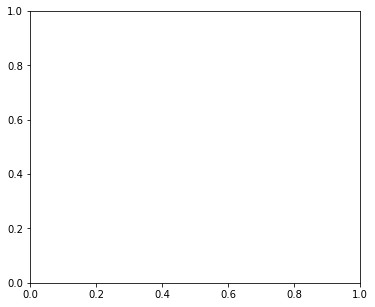

In [15]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_t_o[df_t_o.chargeLepTrue == -1]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax1.hist(df_t_o[df_t_o.chargeLepTrue == 1]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax1.axvline(0)

ax1.legend()

ax1.set_xlabel('eta of Lepton');



ax2 = plt.subplot(122)

ax2.hist(df_t_o[df_t_o.chargeLepTrue == -1]['etaJJTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax2.hist(df_t_o[df_t_o.chargeLepTrue == 1]['etaJJTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax2.axvline(0)

ax2.legend()

ax2.set_xlabel('eta of W Jet');

In [ ]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.typeLep == 11)]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='neg electron');
ax1.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.typeLep == 13)]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='neg muon');
ax1.axvline(0)

ax1.legend()
ax1.set_xlabel('eta of Lepton');


ax2 = plt.subplot(122)

ax2.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.typeLep == 11)]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos electron');
ax2.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.typeLep == 13)]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos muon');
ax2.axvline(0)

ax2.legend()
ax2.set_xlabel('eta of Lepton');

In [16]:
plt.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)

plt.legend()
plt.title(r'$\eta(N)>0$');
plt.xlabel('E of Lepton');

NameError: name 'df_t_o' is not defined

In [17]:
plt.hist(df_s_o[(df_s_o.chargeLepTrue == -1) & (df_s_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_s_o[(df_s_o.chargeLepTrue == 1) & (df_s_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)

plt.legend()
plt.title(r'$\eta(N)>0$');
plt.xlabel('E of Lepton');

NameError: name 'df_s_o' is not defined

In [18]:
plt.hist(df_s_o[(df_s_o.chargeLepTrue == -1) & (df_s_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_s_o[(df_s_o.chargeLepTrue == 1) & (df_s_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)

plt.legend()
plt.title(r'$\eta(N)>0$');
plt.xlabel('E of Lepton');

NameError: name 'df_s_o' is not defined

In [19]:
plt.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['ptLepTrue'], range=[0,800], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['ptLepTrue'], range=[0,800], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)

plt.legend()
plt.title(r'$\eta(N)>0$');
plt.xlabel('pt of Lepton');

NameError: name 'df_t_o' is not defined

In [20]:
plt.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3);
plt.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3);
plt.axvline(0)

NameError: name 'df_t_o' is not defined

In [21]:
plt.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['etaJJTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3);
plt.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['etaJJTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3);
plt.axvline(0)

NameError: name 'df_t_o' is not defined

In [22]:
# positive charged muon beam had eta = 999
# nagetive charged muon beam had eta = -999

NameError: name 'df_t_o' is not defined

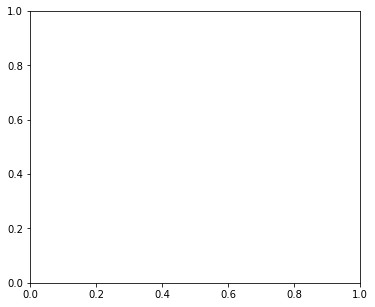

In [23]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['etaLepTrue'], range=[-1,3], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax1.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['etaLepTrue'], range=[-1,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax1.axvline(0)

ax1.legend()

ax1.set_xlabel('eta of Lepton');



ax2 = plt.subplot(122)

ax2.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['etaJJTrue'], range=[-1,3], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax2.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['etaJJTrue'], range=[-1,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax2.axvline(0)

ax2.legend()

ax2.set_xlabel('eta of W Jet');

NameError: name 'df_t_o' is not defined

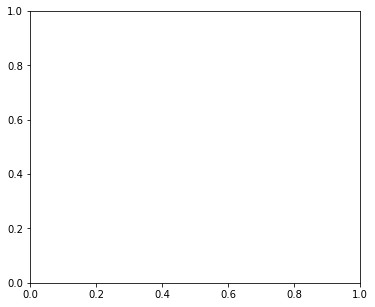

In [24]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['etaLepTrue'] - df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['etaNTrue'], range=[-6,6], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax1.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['etaLepTrue'] - df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['etaNTrue'], range=[-6,6], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax1.axvline(0)

ax1.legend()

ax1.set_xlabel('eta of Lepton');



# ax2 = plt.subplot(122)

# ax2.hist(df_t_o[df_t_o.chargeLepTrue == -1]['etaJJTrue'], range=[-6,2], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
# ax2.hist(df_t_o[df_t_o.chargeLepTrue == 1]['etaJJTrue'], range=[-6,2], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
# ax2.axvline(0)

# ax2.legend()

# ax2.set_xlabel('eta of W Jet');

NameError: name 'df_t_o' is not defined

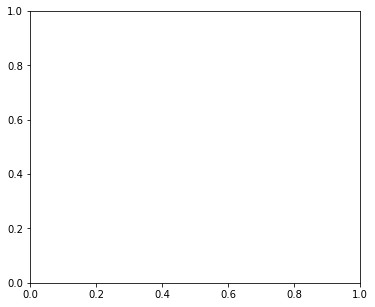

In [25]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

df_neg = df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]
df_pos = df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]

ax1.hist(((df_neg['etaNTrue'] - df_neg['etaLepTrue'])**2 + (df_neg['phiNTrue'] - df_neg['phiLepTrue'])**2)**0.5, range=[0,8], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
ax1.hist(((df_pos['etaNTrue'] - df_pos['etaLepTrue'])**2 + (df_pos['phiNTrue'] - df_pos['phiLepTrue'])**2)**0.5, range=[0,8], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');

ax1.legend()

ax1.set_xlabel('delta R of Lepton and N (t-channel) (eta_N > 0) samples');




NameError: name 'df_s_o' is not defined

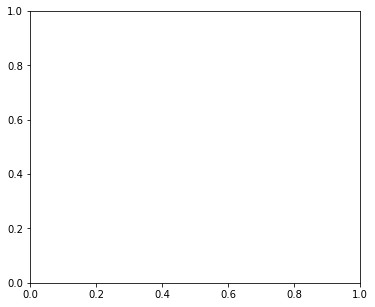

In [26]:
plt.figure(figsize=(13,5))
ax1 = plt.subplot(121)
df_neg = df_s_o[(df_s_o.chargeLepTrue == -1) & (df_s_o.etaNTrue > 0)]
df_pos = df_s_o[(df_s_o.chargeLepTrue == 1) & (df_s_o.etaNTrue > 0)]
ax1.hist(((df_neg['etaNTrue'] - df_neg['etaLepTrue'])**2 + (df_neg['phiNTrue'] - df_neg['phiLepTrue'])**2)**0.5, range=[0,8], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
ax1.hist(((df_pos['etaNTrue'] - df_pos['etaLepTrue'])**2 + (df_pos['phiNTrue'] - df_pos['phiLepTrue'])**2)**0.5, range=[0,8], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
ax1.legend()
ax1.set_xlabel('delta R of Lepton and N (s-channel) (eta_N > 0 samples)');

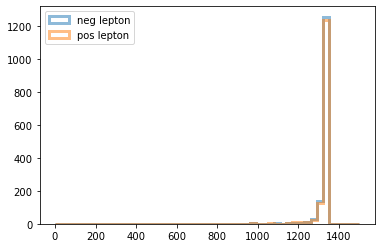

In [41]:
range_ = [0,1500]

plt.hist(df_tM_o[(df_tM_o.chargeLepTrue == -1) & (df_tM_o.etaNTrue > 0)]['pzNTrue'], range=range_, bins=50, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_tM_o[(df_tM_o.chargeLepTrue == 1) & (df_tM_o.etaNTrue > 0)]['pzNTrue'], range=range_, bins=50, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)
plt.legend(loc=2)


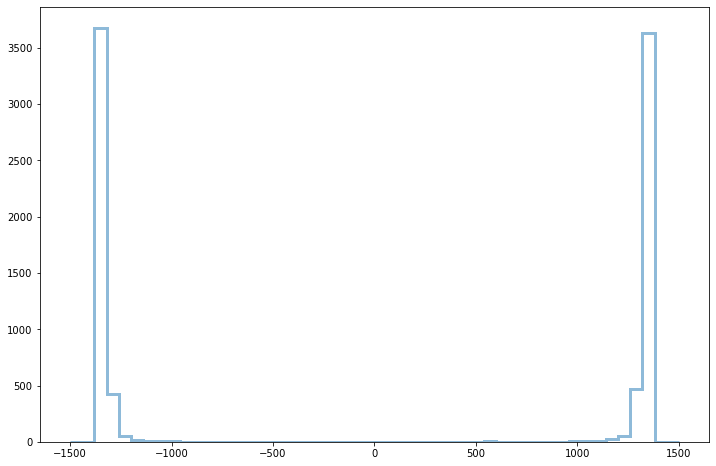

In [53]:
plt.figure(figsize=(12,8))

range_ = [-1500,1500]

plt.hist(df_tM_o['pzNTrue'], range=range_, bins=50, histtype='step', alpha=0.5, lw=3, label='neg lepton');
# plt.axvline(0)
# plt.legend(loc=9)


In [34]:
plt.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['ptNTrue'], range=[10,1400], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['ptNTrue'], range=[10,1400], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)
plt.legend()

NameError: name 'df_t_o' is not defined

In [33]:
plt.hist(df_s_o[(df_s_o.chargeLepTrue == -1) & (df_s_o.etaNTrue > 0)]['pzNTrue'], range=[0,1700], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_s_o[(df_s_o.chargeLepTrue == 1) & (df_s_o.etaNTrue > 0)]['pzNTrue'], range=[0,1700], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)
plt.legend()

NameError: name 'df_s_o' is not defined

In [30]:
plt.hist(df_s_o[(df_s_o.chargeLepTrue == -1) & (df_s_o.etaNTrue > 0)]['etaNTrue'], range=[-1,5], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_s_o[(df_s_o.chargeLepTrue == 1) & (df_s_o.etaNTrue > 0)]['etaNTrue'], range=[-1,5], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)
plt.legend()

NameError: name 'df_s_o' is not defined

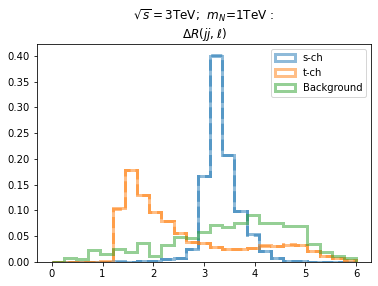

In [1248]:
# plt.figure()
range_ = [0, 6]
plt.hist(df_s['DeltaRjjl'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch', color='C0');
plt.hist(df_s['DeltaRjjlTrue'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C0', linestyle='--');
plt.hist(df_t['DeltaRjjl'], weights=[1/len(df_t)]*len(df_t), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch', color='C1');
plt.hist(df_t['DeltaRjjlTrue'], weights=[1/len(df_t)]*len(df_t), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, color='C1', linestyle='--');
plt.hist(df_b['DeltaRjjl'], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C2');

plt.title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
          r'$\Delta R (jj, \ell)$')
plt.legend()
plt.show()

In [1249]:
df_s[['DeltaRjjl', 'DeltaRjjlTrue']]

,DeltaRjjl,DeltaRjjlTrue
0,3.590940,3.573337
1,3.304816,3.324935
2,3.335180,3.339051
3,3.217755,3.224088
4,3.249262,3.268276
...,...,...
5960,3.113890,3.112576
5961,2.877986,2.886301
5962,3.439068,3.454011
5963,3.821110,3.823561


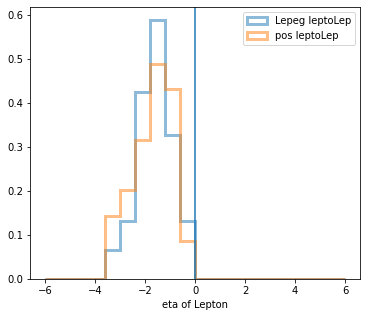

In [1281]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_s_o[(df_s_o.chargeLepTrue == -1) & (df_s_o.etaNTrue > 0) & (df_s_o.pzNTrue > 1300)]['etaLepTrue'] - df_s_o[(df_s_o.chargeLepTrue == -1) & (df_s_o.etaNTrue > 0)]['etaNTrue'], range=[-6,6], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='Lepeg leptoLep');
ax1.hist(df_s_o[(df_s_o.chargeLepTrue == 1) & (df_s_o.etaNTrue > 0) & (df_s_o.pzNTrue > 1300)]['etaLepTrue'] - df_s_o[(df_s_o.chargeLepTrue == 1) & (df_s_o.etaNTrue > 0)]['etaNTrue'], range=[-6,6], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='pos leptoLep');
ax1.axvline(0)

ax1.legend()

ax1.set_xlabel('eta of Lepton');



# ax2 = plt.subplot(122)

# ax2.hist(df_s_o[df_s_o.chargeLepTrue == -1]['etaJJTrue'], range=[-6,2], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
# ax2.hist(df_s_o[df_s_o.chargeLepTrue == 1]['etaJJTrue'], range=[-6,2], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
# ax2.axvline(0)

# ax2.legend()

# ax2.set_xlabel('eta of W Jet');

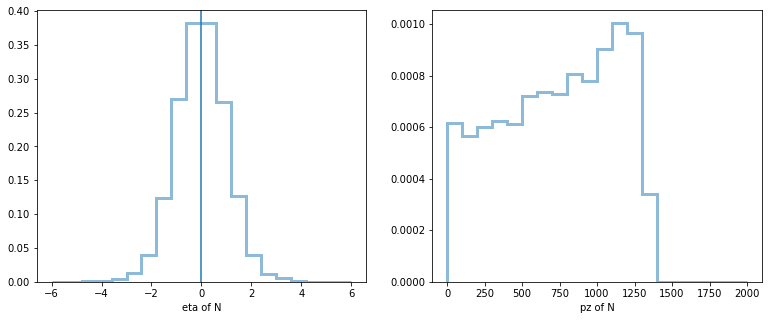

In [1296]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_s_o['etaNTrue'], range=[-6,6], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='neg lepton');
# ax1.hist(df_s_o['etaNTrue'], range=[-6,6], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='pos lepton');
ax1.axvline(0)

# ax1.legend()

ax1.set_xlabel('eta of N');


ax2 = plt.subplot(122)

ax2.hist(df_s_o['pzNTrue'], range=[0, 2000], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='neg lepton');
# ax1.hist(df_t_o['etaNTrue'], range=[-6,6], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='pos lepton');
# ax2.axvline(0)

# ax1.legend()

ax2.set_xlabel('pz of N');

# ax2 = plt.subplot(122)

# ax2.hist(df_s_o[df_s_o.chargeLepTrue == -1]['etaJJTrue'], range=[-6,2], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
# ax2.hist(df_s_o[df_s_o.chargeLepTrue == 1]['etaJJTrue'], range=[-6,2], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
# ax2.axvline(0)

# ax2.legend()

# ax2.set_xlabel('eta of W Jet');

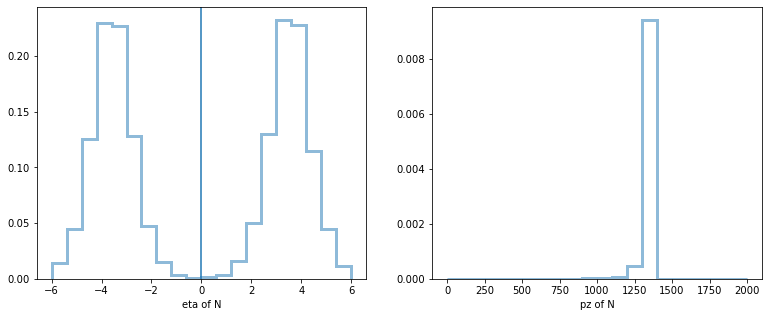

In [1295]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_t_o['etaNTrue'], range=[-6,6], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='neg lepton');
# ax1.hist(df_t_o['etaNTrue'], range=[-6,6], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='pos lepton');
ax1.axvline(0)

# ax1.legend()

ax1.set_xlabel('eta of N');

ax2 = plt.subplot(122)

ax2.hist(df_t_o['pzNTrue'], range=[0, 2000], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='neg lepton');
# ax1.hist(df_t_o['etaNTrue'], range=[-6,6], bins=20, histtype='step', density=True, alpha=0.5, lw=3, label='pos lepton');
# ax2.axvline(0)

# ax1.legend()

ax2.set_xlabel('pz of N');



# ax2 = plt.subplot(122)

# ax2.hist(df_t_o[df_t_o.chargeLepTrue == -1]['etaJJTrue'], range=[-6,2], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
# ax2.hist(df_t_o[df_t_o.chargeLepTrue == 1]['etaJJTrue'], range=[-6,2], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
# ax2.axvline(0)

# ax2.legend()

# ax2.set_xlabel('eta of W Jet');

In [ ]:
b

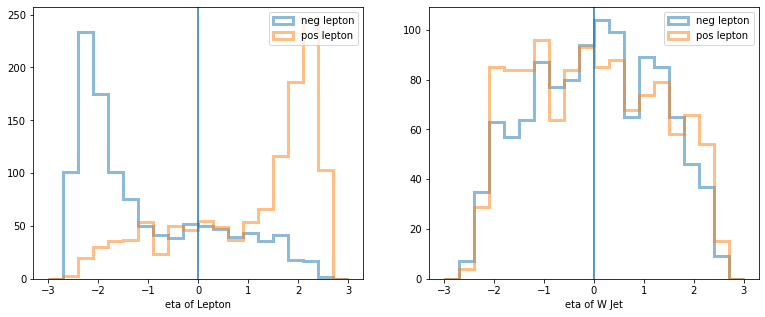

In [1303]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_b_o[df_b_o.chargeLep == -1]['etaLep'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
ax1.hist(df_b_o[df_b_o.chargeLep == 1]['etaLep'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
ax1.axvline(0)

ax1.legend()

ax1.set_xlabel('eta of Lepton');



ax2 = plt.subplot(122)

ax2.hist(df_b_o[df_b_o.chargeLep == -1]['etaJJ'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
ax2.hist(df_b_o[df_b_o.chargeLep == 1]['etaJJ'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
ax2.axvline(0)

ax2.legend()

ax2.set_xlabel('eta of W Jet');

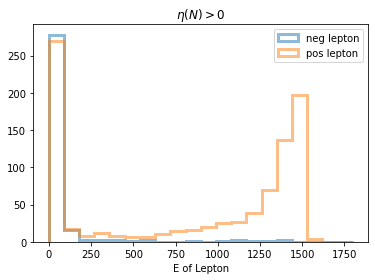

In [1306]:
plt.hist(df_b_o[(df_b_o.chargeLep == -1) & (df_b_o.etaN > 0)]['ELep'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_b_o[(df_b_o.chargeLep == 1) & (df_b_o.etaN > 0)]['ELep'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)

plt.legend()
plt.title(r'$\eta(N)>0$');
plt.xlabel('E of Lepton');

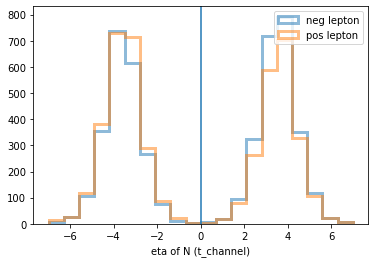

In [12]:
plt.hist(df_t_o[df_t_o.chargeLepTrue == -1]['etaNTrue'], range=[-7,7], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_t_o[df_t_o.chargeLepTrue == 1]['etaNTrue'], range=[-7,7], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
plt.axvline(0)

plt.legend()

plt.xlabel('eta of N (t_channel)');

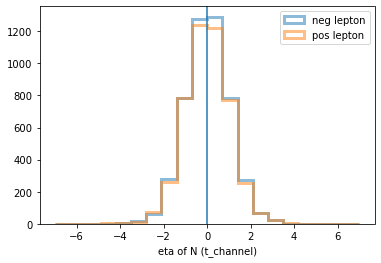

In [15]:
plt.hist(df_s_o[df_s_o.chargeLepTrue == -1]['etaNTrue'], range=[-7,7], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_s_o[df_s_o.chargeLepTrue == 1]['etaNTrue'], range=[-7,7], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
plt.axvline(0)

plt.legend()

plt.xlabel('eta of N (t_channel)');

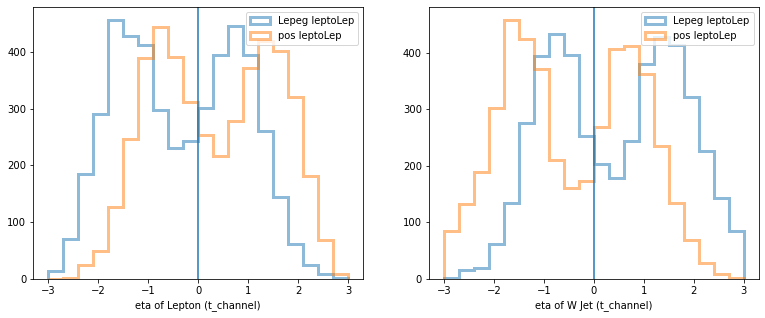

In [16]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_t_o[df_t_o.chargeLepTrue == -1]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax1.hist(df_t_o[df_t_o.chargeLepTrue == 1]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax1.axvline(0)

ax1.legend()

ax1.set_xlabel('eta of Lepton (t_channel)');



ax2 = plt.subplot(122)

ax2.hist(df_t_o[df_t_o.chargeLepTrue == -1]['etaJJTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax2.hist(df_t_o[df_t_o.chargeLepTrue == 1]['etaJJTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax2.axvline(0)

ax2.legend()

ax2.set_xlabel('eta of W Jet (t_channel)');

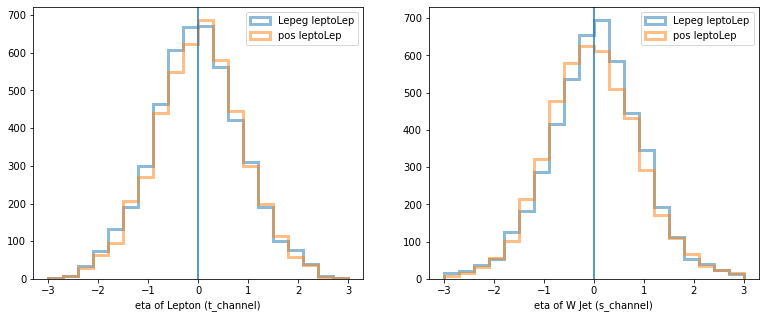

In [20]:
plt.figure(figsize=(13,5))


ax1 = plt.subplot(121)

ax1.hist(df_s_o[df_s_o.chargeLepTrue == -1]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax1.hist(df_s_o[df_s_o.chargeLepTrue == 1]['etaLepTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax1.axvline(0)

ax1.legend()

ax1.set_xlabel('eta of Lepton (t_channel)');



ax2 = plt.subplot(122)

ax2.hist(df_s_o[df_s_o.chargeLepTrue == -1]['etaJJTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='Lepeg leptoLep');
ax2.hist(df_s_o[df_s_o.chargeLepTrue == 1]['etaJJTrue'], range=[-3,3], bins=20, histtype='step', alpha=0.5, lw=3, label='pos leptoLep');
ax2.axvline(0)

ax2.legend()

ax2.set_xlabel('eta of W Jet (s_channel)');

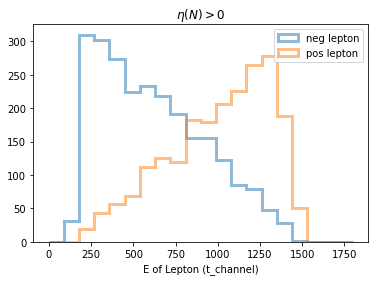

In [18]:
plt.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)

plt.legend()
plt.title(r'$\eta(N)>0$');
plt.xlabel('E of Lepton (t_channel)');

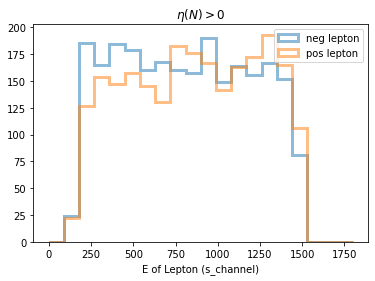

In [19]:
plt.hist(df_s_o[(df_s_o.chargeLepTrue == -1) & (df_s_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_s_o[(df_s_o.chargeLepTrue == 1) & (df_s_o.etaNTrue > 0)]['ELepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)

plt.legend()
plt.title(r'$\eta(N)>0$');
plt.xlabel('E of Lepton (s_channel)');

In [21]:
plt.hist(df_t_o[(df_t_o.chargeLepTrue == -1) & (df_t_o.etaNTrue > 0)]['pzLepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='neg lepton');
plt.hist(df_t_o[(df_t_o.chargeLepTrue == 1) & (df_t_o.etaNTrue > 0)]['pzLepTrue'], range=[-3,1800], bins=20, histtype='step', alpha=0.5, lw=3, label='pos lepton');
# plt.axvline(0)

plt.legend()
plt.title(r'$\eta(N)>0$');
plt.xlabel('E of Lepton (t_channel)');

KeyError: 'pzLepTrue'

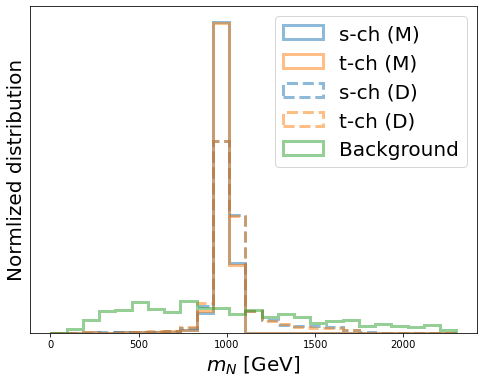

In [19]:

f = plt.figure(figsize=(8,6))
ax2 = plt.subplot(111)

range_ = [0, 2300]

col = 'm'
particle = 'N'


ax2.hist(df_sM[col+particle], weights=[1/len(df_sM)]*len(df_sM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch (M)', color='C0');
ax2.hist(df_tM[col+particle], weights=[1/len(df_tM)]*len(df_tM), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch (M)', color='C1');
ax2.hist(df_sD[col+particle], weights=[1/len(df_sD)]*len(df_sD), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='s-ch (D)', color='C0', linestyle='--');
ax2.hist(df_tD[col+particle], weights=[1/len(df_tD)]*len(df_tD), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='t-ch (D)', color='C1', linestyle='--');
ax2.hist(df_b[col+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C2');


ax2.set_ylabel('Normlized distribution', fontsize=20)
ax2.set_xlabel(r'$m_N ~[\rmGeV]$', fontsize=20)
ax2.set_yticks([])
ax2.legend(loc=1, fontsize=20)


f.savefig('../figures/mN')